In [1]:
# Importing necessary libraries
import pandas as pd

# Reading CSV files
df_logs = pd.read_csv('log.csv')
df_results = pd.read_csv('results.csv')

# Reading text file
with open('throughput.txt', 'r') as f:
    throughput_text = f.read()


In [2]:
df_logs

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,1,0,0,0,0,0,0,0,0,0,...,0,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,1,0,1,1,0,0,0,1,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,-1,-1,-1,-1,-1
3,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,-1,-1,-1
5,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,-1


In [3]:
df_results

,0,1
0,"Then, the man writes over the snow covering th...","Then, the man writes over the snow covering th..."
1,A female chef in white uniform shows a stack o...,A female chef in white uniform shows a stack o...
2,A female chef in white uniform shows a stack o...,A female chef in white uniform shows a stack o...
3,A tray of potatoes is loaded into the oven and...,A tray of potatoes is loaded into the oven and...
4,The man in the center is demonstrating a hairs...,The man in the center is demonstrating a hairs...
5,The man in the blue shirt sits on the chair ne...,The man in the blue shirt sits on the chair ne...


In [4]:
throughput_text

'Autoregressive Decode\n---------------------\nTime = 7719.07s\n\nSpeculative Decode\n------------------\nTime = 1742.53s\n'

In [5]:
import re

def parse_time_info(text):
    autoregressive_time_pattern = r'Autoregressive Decode.*?Time = ([\d.]+)s'
    speculative_time_pattern = r'Speculative Decode.*?Time = ([\d.]+)s'
    
    autoregressive_time = re.search(autoregressive_time_pattern, text, re.DOTALL)
    speculative_time = re.search(speculative_time_pattern, text, re.DOTALL)
    
    if autoregressive_time and speculative_time:
        autoregressive_time = float(autoregressive_time.group(1))
        speculative_time = float(speculative_time.group(1))
        
        return {'Autoregressive Time': autoregressive_time, 'Speculative Time': speculative_time}
    else:
        return None

parsed_time_info = parse_time_info(throughput_text)

if parsed_time_info:
    print(f"Autoregressive Time: {parsed_time_info['Autoregressive Time']}s")
    print(f"Speculative Time: {parsed_time_info['Speculative Time']}s")
else:
    print("Pattern not found in the text.")


Autoregressive Time: 7719.07s
Speculative Time: 1742.53s


In [7]:
parsed_time_info

{'Autoregressive Time': 7719.07, 'Speculative Time': 1742.53}

In [9]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c2/da/a5622266952ab05dc3995d77689cba600e49ea9d6c51d469c077695cb719/matplotlib-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached matplotlib-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Obtaining dependency information for pillow>=6.2.0 from https://files.pythonhosted.org/packages/3d/36/e78f09d510354977e10102dd811e928666021d9c451e05df962d56477772/Pillow-10.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
  Using cached Pillow-10.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.5 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
Using cached matplotlib-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
Using cached Pillow-10.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)


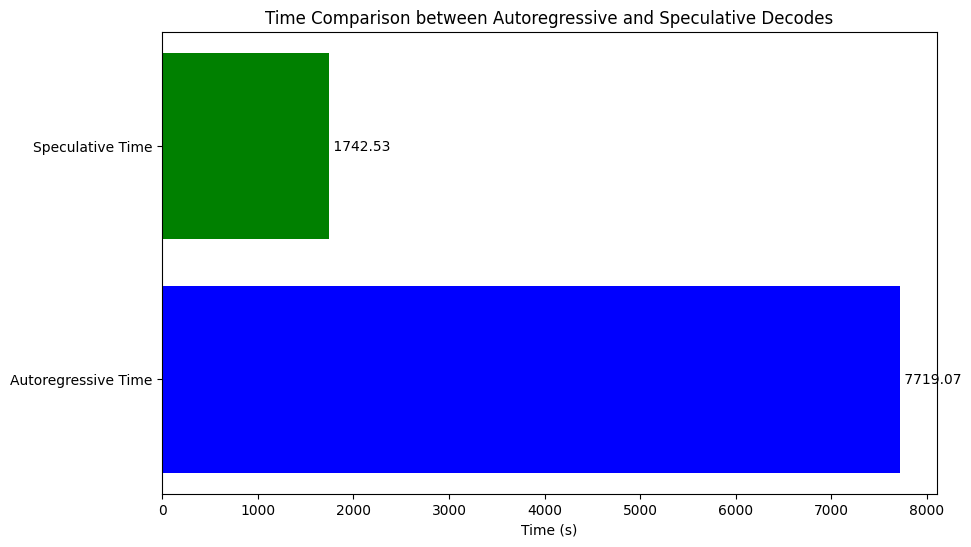

In [10]:
import matplotlib.pyplot as plt

# Data
time_info = parsed_time_info
labels = list(time_info.keys())
times = list(time_info.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(labels, times, color=['blue', 'green'])
plt.xlabel('Time (s)')
plt.title('Time Comparison between Autoregressive and Speculative Decodes')
for i, v in enumerate(times):
    plt.text(v, i, " " + str(v), va='center', color='black')

plt.show()


In [12]:
log_tmp = df_logs.copy()
log_tmp.replace(-1, 0, inplace = True)
token_sum = log_tmp.sum()

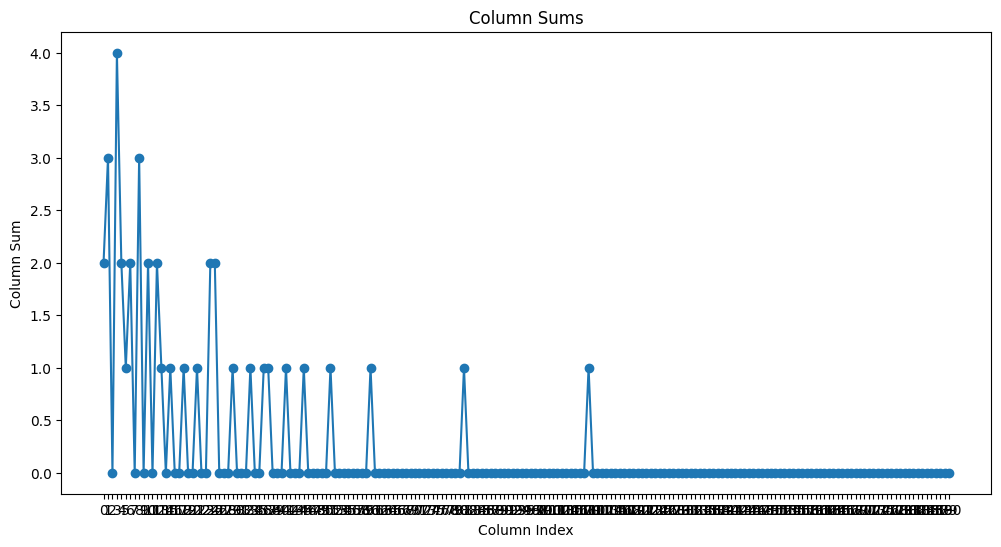

In [14]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(token_sum.index, token_sum.values, marker='o')
plt.xlabel('Column Index')
plt.ylabel('Column Sum')
plt.title('Column Sums')
plt.show()